In [1]:
import scipy
import numpy as np
import pandas as pd

url = 'https://narock.github.io/teaching/CST-411/web_site.tsv'
data = pd.read_csv(url, sep="\t")

x_obs = data['Days'].tolist()
y_obs = data['Time'].tolist()
x_obs = np.array( x_obs )
y_obs = np.array( y_obs )

In [2]:
def mse(y_current, y_obs, N):
    m = np.array( (y_obs-y_current)**2 )
    m = m.sum()/N
    return m

# initial values
epochs = 5000
step_size = 0.00001
m_current = 0.
b_current = 0. 
best_cost = float('inf')
best_m = 0
best_b = 0

N = float(len(y_obs))
for i in range(epochs):
    y_current = (m_current * x_obs) + b_current
    cost = mse(y_current, y_obs, N)
    if ( cost < best_cost ):
        best_cost = cost
        best_m = m_current
        best_b = b_current
    m_gradient = -(2./N) * sum(x_obs * (y_obs - y_current))
    b_gradient = -(2./N) * sum(y_obs - y_current)
    m_current = m_current - (step_size * m_gradient)
    b_current = b_current - (step_size * b_gradient)

print(best_m, best_b, best_cost)

0.23827134332922545 -0.0442405936887855 89.89068515273581


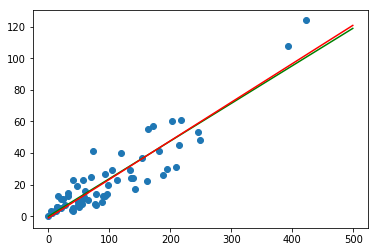

In [5]:
import numpy as np
import matplotlib.pyplot as plt
x = np.arange(0, 500, 1)
y = best_m * x + best_b
data = pd.read_csv(url, sep="\t")
plt.scatter( data['Days'], data['Time'] )
plt.plot(x, y, color='green')
plt.plot( x, 0.24410947*x - 1.06368865, color='red' )

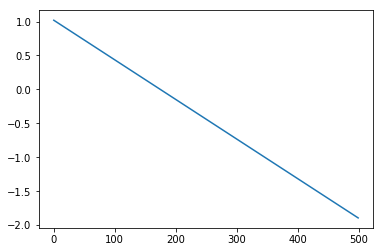

In [4]:
y_curve_fit = 0.24410947*x - 1.06368865
plt.plot(x, (y-y_curve_fit))